In [22]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
# Import the time module.
import time
# Import the datetime module from the datetime library.
from datetime import datetime
from citipy import citipy 
from config import openweather_api_key

In [5]:
# Create a set of random latitude and longitude combinations. we pair them together with zip
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [6]:
# The zip object packs each pair of lats and lngs having the same index in their respective array into a tuple. 
# If there are 1,500 latitudes and longitudes, there will be 1,500 tuples of paired latitudes and longitudes, 
# where each latitude and longitude in a tuple can be accessed by the index of 0 and 1, respectively.

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in lat_lngs:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

604

In [10]:
# syntax: api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}
api_key = openweather_api_key
url = "http://api.openweathermap.org/data/2.5/weather?"

In [9]:
# create an empty list to add in weather data and create print statement before to show logging
city_data = []
# print logging
print("Beggining Data Retrieval     ")
print("-----------------------------")

# create counters so we can group in sets of 50 to log process as we find weather data for each city (from 1 to 50)
record_count = 1
set_count = 1

Beggining Data Retrieval     
-----------------------------


In [ ]:
# next we want to iterate through our list of cities and begin building the URL for each city while grouping up to 50
# use for i in range(len(cities)) and index to tell us when we have gotten to 50. we can also retrieve cities from our cities list
for i in range((len(cities))):
    # group cities in sets of 50 for logging purposes
    if (i% 50 ==0 and i>= 50):
        set_count += 1
        record_count = 1
    # create the endpoint url with each city
    city_url = f"{url}appid={api_key}&q={cities[i]}"

In [ ]:
# The above will give us errors because the query wont read the cities from the list, but rather the index
# to fix this issue we need to create another for loop to get the city from the cities list
# use the enumerate() method as an alternative way to retrieve both the index and city from the list

In [13]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city. # when using fstrings, make sure you are not using the same quotes inside as out
    city_url = f"{url}appid={api_key}&q={city.replace(' ', '+')}"

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 5 of Set 13 | mataura
Processing Record 6 of Set 13 | okhotsk
Processing Record 7 of Set 13 | tabou
Processing Record 8 of Set 13 | wilmington
Processing Record 9 of Set 13 | yatou
Processing Record 10 of Set 13 | new norfolk
Processing Record 11 of Set 13 | bluff
Processing Record 12 of Set 13 | pangody
Processing Record 13 of Set 13 | castro
Processing Record 14 of Set 13 | bredasdorp
Processing Record 15 of Set 13 | saint-georges
Processing Record 16 of Set 13 | paradwip
City not found. Skipping...
Processing Record 17 of Set 13 | georgetown
Processing Record 18 of Set 13 | keetmanshoop
Processing Record 19 of Set 13 | karratha
Processing Record 20 of Set 13 | khatanga
Processing Record 21 of Set 13 | saskylakh
Processing Record 22 of Set 13 | tuktoyaktuk
Processing Record 23 of Set 13 | pontes e lacerda
Processing Record 24 of Set 13 | hermanus
Processing Record 25 of Set 13 | rikitea
Processing Record 26 of Set 13 | vaini
Processing Record 27 of Set 13 | ignatovk

Processing Record 39 of Set 16 | chokurdakh
Processing Record 40 of Set 16 | pochutla
Processing Record 41 of Set 16 | guerande
Processing Record 42 of Set 16 | biscarrosse
Processing Record 43 of Set 16 | cheuskiny
City not found. Skipping...
Processing Record 44 of Set 16 | kupang
Processing Record 45 of Set 16 | brejinho
Processing Record 46 of Set 16 | alofi
Processing Record 47 of Set 16 | paamiut
Processing Record 48 of Set 16 | hwange
Processing Record 49 of Set 16 | richards bay
Processing Record 50 of Set 16 | illoqqortoormiut
City not found. Skipping...
Processing Record 1 of Set 17 | makaryev
Processing Record 2 of Set 17 | keti bandar
Processing Record 3 of Set 17 | thompson
Processing Record 4 of Set 17 | grand gaube
Processing Record 5 of Set 17 | lumeje
Processing Record 6 of Set 17 | iralaya
Processing Record 7 of Set 17 | berwick
Processing Record 8 of Set 17 | qaanaaq
Processing Record 9 of Set 17 | duncan
Processing Record 10 of Set 17 | belmonte
Processing Record 11

Processing Record 19 of Set 20 | dargaville
Processing Record 20 of Set 20 | provideniya
Processing Record 21 of Set 20 | tibati
Processing Record 22 of Set 20 | dieppe
Processing Record 23 of Set 20 | cervo
Processing Record 24 of Set 20 | lorengau
Processing Record 25 of Set 20 | hofn
Processing Record 26 of Set 20 | tabanan
Processing Record 27 of Set 20 | san quintin
Processing Record 28 of Set 20 | waitati
Processing Record 29 of Set 20 | victoria
Processing Record 30 of Set 20 | zemio
Processing Record 31 of Set 20 | bulgan
Processing Record 32 of Set 20 | cabo san lucas
Processing Record 33 of Set 20 | stokmarknes
Processing Record 34 of Set 20 | anadyr
Processing Record 35 of Set 20 | samalaeulu
City not found. Skipping...
Processing Record 36 of Set 20 | feijo
Processing Record 37 of Set 20 | champerico
Processing Record 38 of Set 20 | tumannyy
City not found. Skipping...
Processing Record 39 of Set 20 | plaiesii-de-jos
City not found. Skipping...
Processing Record 40 of Set 2

Processing Record 3 of Set 24 | datong
Processing Record 4 of Set 24 | shubarshi
Processing Record 5 of Set 24 | port hedland
Processing Record 6 of Set 24 | puro
Processing Record 7 of Set 24 | aleysk
Processing Record 8 of Set 24 | caucaia
Processing Record 9 of Set 24 | henties bay
Processing Record 10 of Set 24 | saint-augustin
Processing Record 11 of Set 24 | la asuncion
Processing Record 12 of Set 24 | aswan
Processing Record 13 of Set 24 | port alberni
Processing Record 14 of Set 24 | vysokogornyy
Processing Record 15 of Set 24 | serenje
Processing Record 16 of Set 24 | inta
Processing Record 17 of Set 24 | longido
Processing Record 18 of Set 24 | kargil
Processing Record 19 of Set 24 | jiaohe
Processing Record 20 of Set 24 | ulaanbaatar
Processing Record 21 of Set 24 | burnie
Processing Record 22 of Set 24 | conceicao do mato dentro
Processing Record 23 of Set 24 | licata
Processing Record 24 of Set 24 | zharkent
Processing Record 25 of Set 24 | djambala
Processing Record 26 of

In [14]:
len(city_data)

556

In [15]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mataura,-46.1927,168.8643,282.86,73,3,0.92,NZ,2021-06-07 22:33:24
1,Okhotsk,59.3833,143.3000,282.34,78,69,2.25,RU,2021-06-07 22:33:24
2,Tabou,4.4230,-7.3528,299.38,79,90,3.72,CI,2021-06-07 22:33:25
3,Wilmington,34.2257,-77.9447,301.45,81,75,4.63,US,2021-06-07 22:28:37
4,Yatou,37.1500,122.3833,293.97,76,92,3.39,CN,2021-06-07 22:33:25
5,New Norfolk,-42.7826,147.0587,284.87,80,96,1.47,AU,2021-06-07 22:33:26
6,Bluff,-46.6000,168.3333,283.04,77,9,2.55,NZ,2021-06-07 22:33:26
7,Pangody,65.8500,74.4859,276.79,69,69,2.84,RU,2021-06-07 22:33:26
8,Castro,-24.7911,-50.0119,284.96,98,75,1.59,BR,2021-06-07 22:33:27
9,Bredasdorp,-34.5322,20.0403,285.77,67,100,2.17,ZA,2021-06-07 22:33:27


In [17]:
# to change column order, you must declare a list with the new column orders, then pass it through the dataframe
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mataura,NZ,2021-06-07 22:33:24,-46.1927,168.8643,282.86,73,3,0.92
1,Okhotsk,RU,2021-06-07 22:33:24,59.3833,143.3000,282.34,78,69,2.25
2,Tabou,CI,2021-06-07 22:33:25,4.4230,-7.3528,299.38,79,90,3.72
3,Wilmington,US,2021-06-07 22:28:37,34.2257,-77.9447,301.45,81,75,4.63
4,Yatou,CN,2021-06-07 22:33:25,37.1500,122.3833,293.97,76,92,3.39
5,New Norfolk,AU,2021-06-07 22:33:26,-42.7826,147.0587,284.87,80,96,1.47
6,Bluff,NZ,2021-06-07 22:33:26,-46.6000,168.3333,283.04,77,9,2.55
7,Pangody,RU,2021-06-07 22:33:26,65.8500,74.4859,276.79,69,69,2.84
8,Castro,BR,2021-06-07 22:33:27,-24.7911,-50.0119,284.96,98,75,1.59
9,Bredasdorp,ZA,2021-06-07 22:33:27,-34.5322,20.0403,285.77,67,100,2.17


In [19]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [20]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [24]:
# definining today's date
# Get today's date in seconds.
today = time.strftime("%x")
today

'06/07/21'

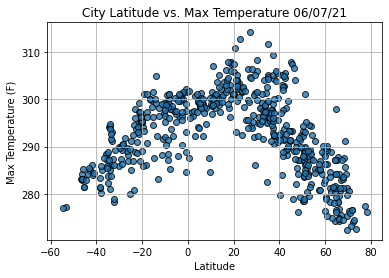

In [25]:
# build the scatter plot for lat vs max temp. using lat as the x, and temp as y 
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/latvsmaxtemp.png")

# Show plot.
plt.show()

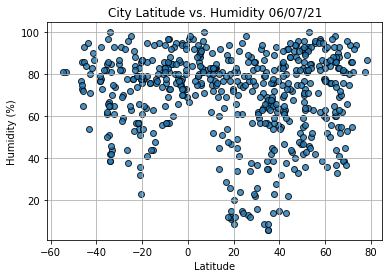

In [26]:
# we can repurpose the code by replacing just the Y-axis and the print
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/latvshumidity.png")

# Show plot.
plt.show()

In [ ]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/latvscloudines.png")
# Show plot.
plt.show()